Let's visualize iris data: either this species or not

In [1]:
# let's import iris dataset

import sklearn
from sklearn import datasets

iris = datasets.load_iris()
X_temp = iris.data
y_temp = iris.target

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [5]:
# we will work with only 2 type of set (sepal's length and width)
X, y = X_temp[:, [0, 1]], y_temp

# test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [7]:
# standardarize the feature
# calculates the mean and standard deviation of the features in X_train
# These values are stored inside the scaler (not the actual transformed data yet)
scaler = preprocessing.StandardScaler().fit(X_train)

In [9]:
# scaler computes and stores the mean and standard deviation of each feature from X_train only
# Then when we call X_test,
# It uses the same mean and std learned from X_train to transform X_test

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# the standardarize and transform make the mean=0 and std=1 (learn more...)
# Testing set is not perfectly standardized — and that’s good! You don’t want to "cheat" by fitting the scaler on it.

# It shows that the test data is slightly different, which is realistic and healthy for model evaluation.
import numpy as np
print ('Training set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_train),np.std(X_train)))
print ('Testing set mean:{:.2f} and standard deviation:{:.2f}'.format(np.average(X_test),np.std(X_test)))

Training set mean:0.00 and standard deviation:1.00
Testing set mean:0.13 and standard deviation:0.71


*****

Above this all are feature training

*****

As feature training is done, lets ploting the data

In [13]:
import matplotlib.pyplot as plt

colour_mk = [['red', 's'], ['green', 'o'], ['blue', 'x']]
plt.figure('Training Data')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:
y_train

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1,
       2, 0])

In [17]:
y_test

array([1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0,
       2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1])

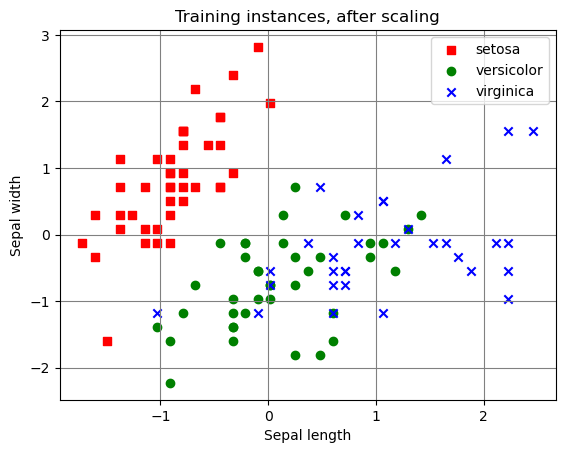

In [25]:
for i in range(len(colour_mk)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    # scatter is used to plot data points in 2D scatter plot
    # c refers the color for class i is the first item
    # market refers the marker shape for class
    plt.scatter(xs, ys, c=colour_mk[i][0], marker=colour_mk[i][1])

plt.style.use('default')
plt.grid(c='grey')

plt.title('Training instances, after scaling')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [27]:
# we don't want to modify the original array
import copy

# creating the copy
y_train_setosa = copy.copy(y_train)
# if 0 then 0, but if 1 or 2 then 1
y_train_setosa[y_train_setosa > 0] =1

# creating the copy
y_test_setosa = copy.copy(y_test)
# if 0 then 0, but if 1 or 2 then 1
y_test_setosa[y_test_setosa > 0] = 1

print('New training target classes: \n{0}'.format(y_train_setosa))

New training target classes: 
[1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0]


if we classify a portion by a line, we can work with it as a linear classification

Also called feature space's hyperplane

We will use SGDClassifier, although it is not a classifier. It is linear but optimized with stockastic gradient decent

In [33]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='log_loss', random_state=42)

In [35]:
# let's train
clf.fit(X_train, y_train_setosa)

SGDClassifier(loss='log_loss', random_state=42)

In [37]:
clf

SGDClassifier(loss='log_loss', random_state=42)

In [39]:
# y = mx + b
print(clf.coef_, clf.intercept_)

[[ 21.76180378 -10.51985219]] [13.90763026]


clf.coef_ = [[2.0, -1.5]]
clf.intercept_ = [0.5]

y = 2.0 * feature1 - 1.5 * feature2 + 0.5

The model uses this formula to decide which class an input belongs to.

1. If y is positive → one class (e.g., "Setosa")
2. If y is negative → the other class (e.g., "Not Setosa")

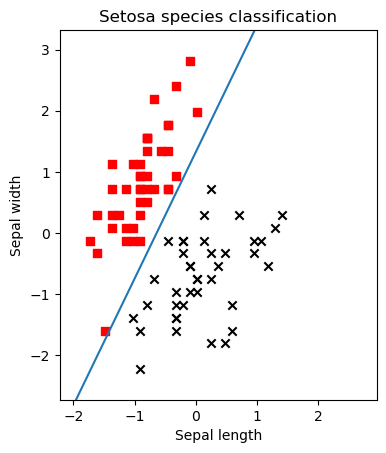

In [41]:
# define plotting bounds
# extracts the min and max values from the first two features
# add a buffer of 0.5 for better visualization margins
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

# create x-values for the decision boundary line
xs = np.arange(x_min, x_max, 0.5)

# setup the plot
fig,axes = plt.subplots()

axes.set_aspect('equal')
axes.set_title('Setosa species classification')
axes.set_xlabel('Sepal length')
axes.set_ylabel('Sepal width')
axes.set_xlim(x_min, x_max)
axes.set_ylim(y_min, y_max)

# set current axes
plt.sca(axes)

# plot training data point
plt.scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], c='red', marker='s')
plt.scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], c='black', marker='x')

# plot the decision boundary
ys = (-clf.intercept_[0]- xs * clf.coef_[0, 0]) / clf.coef_[0, 1]

plt.plot(xs, ys)

# show
plt.show()

In [43]:
# let's predict
print ('If the flower has 4.6 petal width and 3.2 petal length is a {}'.format(
        iris.target_names[clf.predict(scaler.transform([[4.6, 3.2]]))]))

If the flower has 4.6 petal width and 3.2 petal length is a ['setosa']


*****


Let's work with a decission tree classifier


*****

This python code uses scikit-learn and matplotlib to visualize how a decision tree classifier works on the iris dataset, particularly how it makes decisions based on different pairs of features

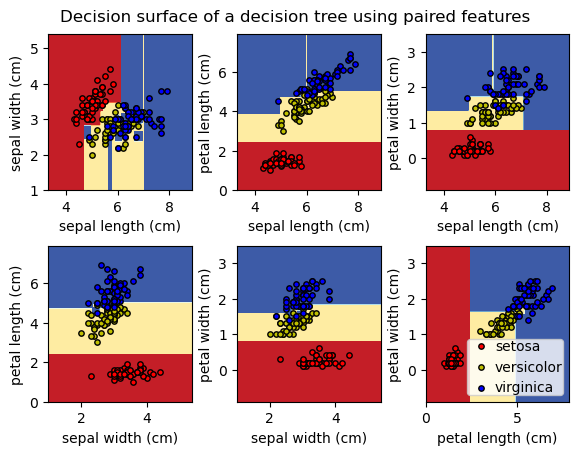

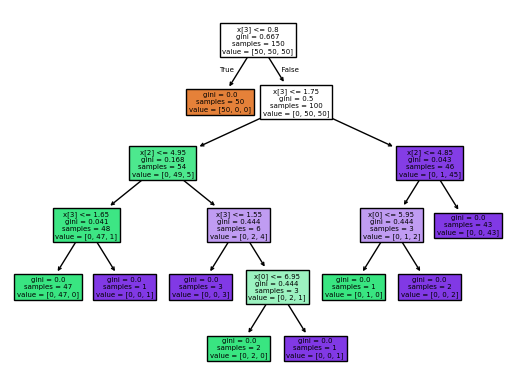

In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# number of target classes
n_classes = 3
plot_colors = 'ryb'
# defines the resolution of the decision surface grid
plot_step = 0.02

# as there are 4 value we can have 6 possible pairs
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    
    # for each pair select two features
    X = iris.data[:, pair]
    y = iris.target

    # train a decision tree on those two features
    clf = DecisionTreeClassifier().fit(X, y)
    
    # decision boundary plot
    plt.subplot(2, 3, pairidx + 1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    # predict the class for each point
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot the decision regions
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # plot the training point on top
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                     edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()